# Importing data set

In [39]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_fb79abb3e90b4d559452e958b889a0e1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='up0ENSdaqBPsAqbQB3uKFIkKFL24yCp4_CByktL9K8q8',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fb79abb3e90b4d559452e958b889a0e1.get_object(Bucket='diabetes-donotdelete-pr-svs2om1aramqgp',Key='diabetic_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

import numpy as np
import matplotlib.pyplot as plt
    
data = pd.read_csv(body)




#### Checking number of rows and columns

In [40]:
data.shape

(101766, 50)

# Dropping unnecessary data

In [41]:
data.drop(['race','encounter_id', 'patient_nbr', 'weight','medical_specialty', 'payer_code','admission_source_id','chlorpropamide','acetohexamide', 'tolbutamide', 'rosiglitazone', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'glyburide-metformin', 'glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone','discharge_disposition_id','diag_1','diag_2','diag_3','metformin','repaglinide','nateglinide','glimepiride','glipizide','glyburide','pioglitazone','acarbose','change','number_outpatient','number_inpatient','max_glu_serum','admission_type_id'], axis=1, inplace= True)

In [42]:
data.shape

(101766, 12)

In [43]:
data

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,A1Cresult,insulin,diabetesMed,readmitted
0,Female,[0-10),1,41,0,1,0,1,None,No,No,NO
1,Female,[10-20),3,59,0,18,0,9,None,Up,Yes,>30
2,Female,[20-30),2,11,5,13,0,6,None,No,Yes,NO
3,Male,[30-40),2,44,1,16,0,7,None,Up,Yes,NO
4,Male,[40-50),1,51,0,8,0,5,None,Steady,Yes,NO
5,Male,[50-60),3,31,6,16,0,9,None,Steady,Yes,>30
6,Male,[60-70),4,70,1,21,0,7,None,Steady,Yes,NO
7,Male,[70-80),5,73,0,12,0,8,None,No,Yes,>30
8,Female,[80-90),13,68,2,28,0,8,None,Steady,Yes,NO
9,Female,[90-100),12,33,3,18,0,8,None,Steady,Yes,NO


In [44]:
data.isnull().any()

gender                False
age                   False
time_in_hospital      False
num_lab_procedures    False
num_procedures        False
num_medications       False
number_emergency      False
number_diagnoses      False
A1Cresult             False
insulin               False
diabetesMed           False
readmitted            False
dtype: bool

In [45]:
data.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,1.339730,16.021844,0.197836,7.422607
std,2.985108,19.674362,1.705807,8.127566,0.930472,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,9.000000
max,14.000000,132.000000,6.000000,81.000000,76.000000,16.000000


# Modifying data in columns for preprocessing

### 1.A1C result

In [46]:
data['A1Cresult']

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26          >7
27        None
28        None
29        None
          ... 
101736    None
101737    None
101738    None
101739    None
101740    None
101741    None
101742      >8
101743    None
101744    None
101745      >8
101746    None
101747      >7
101748      >7
101749    Norm
101750    None
101751    Norm
101752    None
101753    None
101754      >7
101755      >8
101756    None
101757    None
101758    None
101759    None
101760    None
101761      >8
101762    None
101763    None
101764    None
101765    None
Name: A1Cresult, Length: 101766, dtype: object

In [47]:
data['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [48]:
def fun(z):
    if z =='None' or z=='Norm':
        return 1
    else :
        return 0
data['A1C']= data['A1Cresult'].map(fun)
data.drop(['A1Cresult'], axis=1, inplace= True)

In [49]:
data['A1C'].head()

0    1
1    1
2    1
3    1
4    1
Name: A1C, dtype: int64

In [50]:
data['A1C'].value_counts()

1    89738
0    12028
Name: A1C, dtype: int64

### 2.Readmission

In [51]:
data['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
5         >30
6          NO
7         >30
8          NO
9          NO
10        >30
11        <30
12        <30
13         NO
14        >30
15         NO
16        <30
17         NO
18        >30
19         NO
20         NO
21         NO
22         NO
23        >30
24         NO
25         NO
26         NO
27        >30
28        >30
29        >30
         ... 
101736    >30
101737     NO
101738     NO
101739     NO
101740     NO
101741     NO
101742     NO
101743     NO
101744     NO
101745     NO
101746    <30
101747    >30
101748    >30
101749     NO
101750    <30
101751     NO
101752     NO
101753     NO
101754    >30
101755    >30
101756    >30
101757     NO
101758     NO
101759     NO
101760    >30
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [52]:
data['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [53]:
def fn(x):
    if x =='NO' or x=='>30':
        return 0
    else :
        return 1
data['readmit']= data['readmitted'].map(fn)
data.drop(['readmitted'], axis=1, inplace= True)

In [54]:
data['readmit'].head()

0    0
1    0
2    0
3    0
4    0
Name: readmit, dtype: int64

In [55]:
data['readmit'].value_counts()


0    90409
1    11357
Name: readmit, dtype: int64

### 3.Age

In [56]:
data['age'].head()

0     [0-10)
1    [10-20)
2    [20-30)
3    [30-40)
4    [40-50)
Name: age, dtype: object

In [57]:
data['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [58]:
def gt_ag(a):
    if a =='[0-10)' or a=='[10-20)' or a=='[20-30)':
        return 'young'
    elif a =='[30-40)' or a=='[40-50)' or a=='[50-60)':
        return 'mid'
    else:
        return'old'
data['Age']= data['age'].map(gt_ag)
data.drop(['age'], axis=1, inplace= True)

In [59]:
data['Age'].head()

0    young
1    young
2    young
3      mid
4      mid
Name: Age, dtype: object

In [60]:
data['Age'].value_counts()

old      68541
mid      30716
young     2509
Name: Age, dtype: int64

### Replacing "?" ,"NA" ,"None" with numpy NaN

In [61]:
data=data.replace('?',np.nan)
data=data.replace('NA',np.nan)
data=data.replace('None',np.nan)

### Filling NaN values

In [62]:
data.isnull().any()

gender                False
time_in_hospital      False
num_lab_procedures    False
num_procedures        False
num_medications       False
number_emergency      False
number_diagnoses      False
insulin               False
diabetesMed           False
A1C                   False
readmit               False
Age                   False
dtype: bool

In [63]:
data['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [64]:
data = data[data.gender != 'Unknown/Invalid']

In [65]:
data['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

In [66]:
data

,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_emergency,number_diagnoses,insulin,diabetesMed,A1C,readmit,Age
0,Female,1,41,0,1,0,1,No,No,1,0,young
1,Female,3,59,0,18,0,9,Up,Yes,1,0,young
2,Female,2,11,5,13,0,6,No,Yes,1,0,young
3,Male,2,44,1,16,0,7,Up,Yes,1,0,mid
4,Male,1,51,0,8,0,5,Steady,Yes,1,0,mid
5,Male,3,31,6,16,0,9,Steady,Yes,1,0,mid
6,Male,4,70,1,21,0,7,Steady,Yes,1,0,old
7,Male,5,73,0,12,0,8,No,Yes,1,0,old
8,Female,13,68,2,28,0,8,Steady,Yes,1,0,old
9,Female,12,33,3,18,0,8,Steady,Yes,1,0,old


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


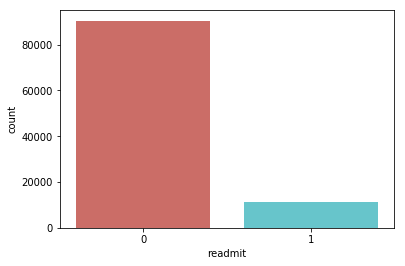

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='readmit',data=data, palette='hls')
plt.show()

# Slicing of data

In [29]:
y=data.iloc[:,-2:-1].values

In [30]:
data.drop('readmit',axis=1,inplace=True)

In [31]:
x=data.values

In [32]:
x

array([['Female', 1, 41, ..., 'No', 1, 'young'],
       ['Female', 3, 59, ..., 'Yes', 1, 'young'],
       ['Female', 2, 11, ..., 'Yes', 1, 'young'],
       ..., 
       ['Male', 1, 53, ..., 'Yes', 1, 'old'],
       ['Female', 10, 45, ..., 'Yes', 1, 'old'],
       ['Male', 6, 13, ..., 'No', 1, 'old']], dtype=object)

In [33]:
y

array([[0],
       [0],
       [0],
       ..., 
       [0],
       [0],
       [0]])

# Encoding of data

In [34]:
x[0]

array(['Female', 1, 41, 0, 1, 0, 1, 'No', 'No', 1, 'young'], dtype=object)

In [35]:
x[0:5,:]

array([['Female', 1, 41, 0, 1, 0, 1, 'No', 'No', 1, 'young'],
       ['Female', 3, 59, 0, 18, 0, 9, 'Up', 'Yes', 1, 'young'],
       ['Female', 2, 11, 5, 13, 0, 6, 'No', 'Yes', 1, 'young'],
       ['Male', 2, 44, 1, 16, 0, 7, 'Up', 'Yes', 1, 'mid'],
       ['Male', 1, 51, 0, 8, 0, 5, 'Steady', 'Yes', 1, 'mid']], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x[:,0]=lb.fit_transform(x[:,0])
x[:,7]=lb.fit_transform(x[:,7])
x[:,8]=lb.fit_transform(x[:,8])
x[:,10]=lb.fit_transform(x[:,10])

In [37]:
x[0:5,:]

array([[0, 1, 41, 0, 1, 0, 1, 1, 0, 1, 2],
       [0, 3, 59, 0, 18, 0, 9, 3, 1, 1, 2],
       [0, 2, 11, 5, 13, 0, 6, 1, 1, 1, 2],
       [1, 2, 44, 1, 16, 0, 7, 3, 1, 1, 0],
       [1, 1, 51, 0, 8, 0, 5, 2, 1, 1, 0]], dtype=object)

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
oh1=OneHotEncoder(categorical_features=[7])
oh2=OneHotEncoder(categorical_features=[-1])

In [40]:
x[0:5,:]

array([[0, 1, 41, 0, 1, 0, 1, 1, 0, 1, 2],
       [0, 3, 59, 0, 18, 0, 9, 3, 1, 1, 2],
       [0, 2, 11, 5, 13, 0, 6, 1, 1, 1, 2],
       [1, 2, 44, 1, 16, 0, 7, 3, 1, 1, 0],
       [1, 1, 51, 0, 8, 0, 5, 2, 1, 1, 0]], dtype=object)

In [41]:
x=oh1.fit_transform(x).toarray()
x = x[:,1:]

In [42]:
x[0:5,:]

array([[  1.,   0.,   0.,   0.,   1.,  41.,   0.,   1.,   0.,   1.,   0.,
          1.,   2.],
       [  0.,   0.,   1.,   0.,   3.,  59.,   0.,  18.,   0.,   9.,   1.,
          1.,   2.],
       [  1.,   0.,   0.,   0.,   2.,  11.,   5.,  13.,   0.,   6.,   1.,
          1.,   2.],
       [  0.,   0.,   1.,   1.,   2.,  44.,   1.,  16.,   0.,   7.,   1.,
          1.,   0.],
       [  0.,   1.,   0.,   1.,   1.,  51.,   0.,   8.,   0.,   5.,   1.,
          1.,   0.]])

In [43]:
x=oh2.fit_transform(x).toarray()
x = x[:,1:]

In [44]:
x[11,:]

array([  1.,   0.,   0.,   1.,   0.,   1.,   7.,  62.,   0.,  11.,   0.,
         7.,   1.,   1.])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Feature Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

# Comparing algorithms

### 1.Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
classifier = LogisticRegression()

In [49]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', sc), ('lor', classifier)])

In [50]:
lor = pipeline.fit(x_train, y_train)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
y_pred1 = lor.predict(x_test)

#### Accuracy

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_pred1,y_test)

0.8857662261091731

In [54]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred1)
roc_auc_log = metrics.auc(fpr, tpr)

In [55]:
roc_auc_log

0.50018731912842862

In [56]:
fpr

array([  0.00000000e+00,   5.54692700e-05,   1.00000000e+00])

(0, 1)

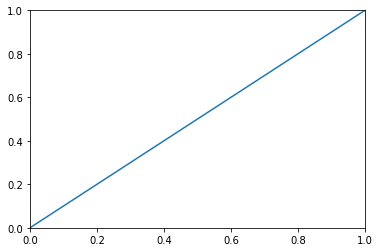

In [57]:
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])

### 2.K-Nearest Neighbour

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)

In [60]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', sc), ('pip_knn', knn)])

In [61]:
pip_knn = pipeline.fit(x_train , y_train)
y_pred2 = pip_knn.predict(x_test)


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [62]:
accuracy_score(y_pred2,y_test)

0.87633272736205969

In [63]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
roc_auc_knn = metrics.auc(fpr, tpr)

In [64]:
roc_auc_knn

0.49935792828837339

(0, 1)

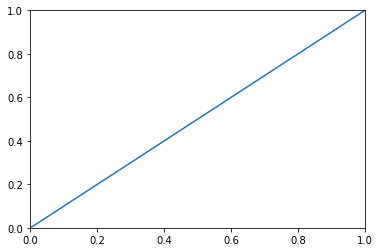

In [65]:
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])

### 3.Support Vector Classifier

In [66]:
from sklearn.svm import SVC

In [67]:
svc = SVC(kernel='linear')


In [68]:
pipeline = Pipeline([('scaler', sc), ('pip_svc', svc)])

In [69]:
pip_svc = pipeline.fit(x_train , y_train)
y_pred3 = pip_svc.predict(x_test)
accuracy_score(y_pred3,y_test)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8857662261091731

In [70]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred3)
roc_auc_svm = metrics.auc(fpr, tpr)

In [71]:
roc_auc_svm

0.5

(0, 1)

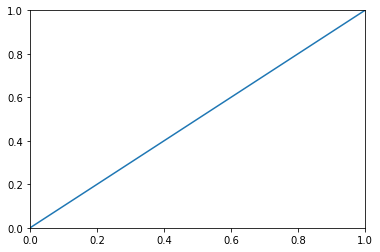

In [72]:
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])

In [73]:
from sklearn.svm import SVC
svc1=SVC(kernel='rbf')

pipeline = Pipeline([('scaler', sc), ('pip_svc1', svc1)])
pip_svc1 = pipeline.fit(x_train , y_train)
y_pred4 = pip_svc1.predict(x_test)
accuracy_score(y_pred4,y_test)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8857662261091731

In [74]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred4)
roc_auc_svm_rbf = metrics.auc(fpr, tpr)

In [75]:
roc_auc_svm_rbf

0.5

(0, 1)

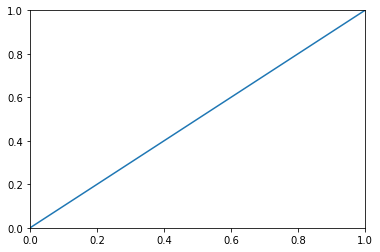

In [76]:
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])

In [77]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
pipeline = Pipeline([('scaler', sc), ('pip_nb', classifier_nb)])
pip_nb = pipeline.fit(x_train , y_train)
y_pred5 = pip_nb.predict(x_test)
accuracy_score(y_pred5,y_test)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8771188522576524

In [78]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred5)
roc_auc_naive = metrics.auc(fpr, tpr)

In [79]:
roc_auc_naive

0.50860568148471552

(0, 1)

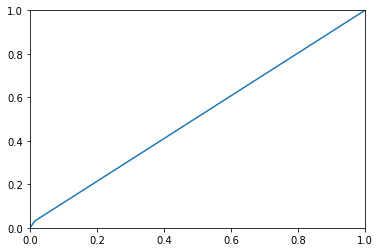

In [80]:
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])

In [81]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
pipeline = Pipeline([('scaler', sc), ('pip_dt', classifier_dt)])
pip_dt = pipeline.fit(x_train , y_train)
y_pred6 = pip_dt.predict(x_test)
accuracy_score(y_pred6,y_test)

0.79089077777231853

In [82]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred6)
roc_auc_dt = metrics.auc(fpr, tpr)

In [83]:
roc_auc_dt

0.5032021157053187

(0, 1)

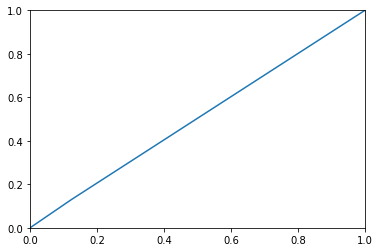

In [84]:
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy',n_estimators = 10)
pipeline = Pipeline([('scaler', sc), ('pip_rf', rf)])
pip_rf = pipeline.fit(x_train , y_train)
y_pred7= pip_rf.predict(x_test)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


In [86]:
accuracy_score(y_pred7,y_test)

0.87584139930231419

In [87]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred7)
roc_auc_rf = metrics.auc(fpr, tpr)

In [88]:
roc_auc_rf

0.50170304973625257

(0, 1)

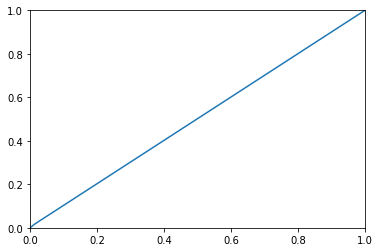

In [89]:
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])

<Container object of 7 artists>

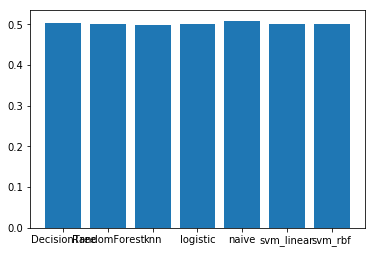

In [90]:
roc=[roc_auc_log,roc_auc_knn,roc_auc_svm,roc_auc_svm_rbf,roc_auc_naive,roc_auc_dt,roc_auc_rf]
model=['logistic','knn','svm_linear','svm_rbf','naive','DecisionTree','RandomForest']

plt.bar(model,roc)

In [91]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-06-29 10:45:50,923 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [92]:
wml_credentials = {
    "url" : "https://eu-gb.ml.cloud.ibm.com",
    "access_key" : "VQbhZuK6LzUUo1vhzPJSfeWebY64FzVLlXmmhgWk-cH-",
    "username" : "c2aa491b-31f4-4ea8-8915-abf87efd9972",
    "password" : "52a130bf-6db5-4818-a69c-4523177f0db9",
    "instance_id" : "fd1c0cea-986c-40ea-82a3-b3c8a908aff4"
}

In [93]:
client=WatsonMachineLearningAPIClient(wml_credentials)

In [94]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME:"veeppiaar",
              client.repository.ModelMetaNames.AUTHOR_EMAIL:"veeppiaar.cse@outlook.com",
              client.repository.ModelMetaNames.NAME:"Diabetes Readmission"}

In [95]:
model_s=client.repository.store_model(pip_svc1,meta_props=model_props)

In [96]:
#client.repository.delete('5f540ae1-52cb-4888-9d78-ed7849c399c1')

In [97]:
client.repository.list()

------------------------------------  --------------------  ------------------------  -----------------  -----------------
GUID                                  NAME                  CREATED                   FRAMEWORK          TYPE
a75d08ea-c9cf-4c68-91a4-d9d2a0a816e6  Diabetes Readmission  2019-06-29T10:45:51.089Z  scikit-learn-0.19  model
084379bd-9e2b-48b9-bcc7-0e130b35130d  Diabetes Readmission  2019-06-29T06:02:13.511Z  scikit-learn-0.19  model
788392ff-ddd1-4f74-ae1d-d9b9ef0ff390  Diabetes Readmission  2019-06-29T05:20:26.442Z  scikit-learn-0.19  model
b98ac290-9d32-41e4-ae1e-d14fdc36eeb9  Diabetes Readmission  2019-06-28T14:45:16.119Z  scikit-learn-0.19  model
b2edf08c-9bb1-4cfd-adb8-014d4a3e878a  M Linear Reg          2019-06-18T09:41:15.593Z  scikit-learn-0.19  model
69308ca3-99ef-4de5-8d1c-0e8fd47d197a  Diabetes Readmission  2019-06-29T06:02:17.429Z  scikit-learn-0.19  online deployment
08ec523f-f233-4ddb-9e79-5edc8136e1c1  Diabetes Readmission  2019-06-29T05:20:41.593Z  sci

In [98]:
pubilshed_model_uid=client.repository.get_model_uid(model_s)

In [99]:
pubilshed_model_uid

'a75d08ea-c9cf-4c68-91a4-d9d2a0a816e6'

In [100]:
d=client.deployments.create(pubilshed_model_uid,name='Diabetes Readmission')



#######################################################################################

Synchronous deployment creation for uid: 'a75d08ea-c9cf-4c68-91a4-d9d2a0a816e6' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6b8312b6-3d28-4ce1-a4d6-3a750153e86e'
------------------------------------------------------------------------------------------------




In [101]:
pip_svc1.predict([[0,1,1,0,0,0,1,41,0,1,0,1,0,1]])

array([0])

In [102]:
scoring_endpoint=client.deployments.get_scoring_url(d)

In [103]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/fd1c0cea-986c-40ea-82a3-b3c8a908aff4/deployments/6b8312b6-3d28-4ce1-a4d6-3a750153e86e/online'

In [104]:
pip_svc1.predict([[0,1,1,0,0,0,1,0,0,1,0,1,0,1]])


array([0])

In [105]:
x[12,:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   7.,  60.,   0.,  15.,   1.,
         8.,   1.,   1.])

In [106]:
pip_svc1.predict([[0,0,0,0,0,0,7,60,0,15,1,8,1,1]])

array([0])